In [1]:
%matplotlib inline

In [2]:
import gc
import pathlib
import sys

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train_filtered.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"
src_dir_path = root_dir_path / "src"

In [5]:
sys.path.append(str(src_dir_path))

In [6]:
from constants import *

In [7]:
train = pd.read_parquet(train_path)

In [8]:
is_train = train["date"] < "2016-01-29"
is_valid = train["date"] >= "2016-01-29"
train, valid = train[is_train], train[is_valid]

In [9]:
del is_train

In [10]:
gc.collect()

0

In [11]:
train.shape

(43375450, 35)

In [12]:
valid.shape

(2652507, 35)

In [13]:
X = train[features]
X_valid = valid[features]
y = train["demand"]
y_valid = valid["demand"]

In [14]:
del train
del valid

In [15]:
gc.collect()

0

In [16]:
model = lgb.LGBMRegressor(importance_type="gain", random_state=0)

In [17]:
model.fit(X, y, categorical_feature=categorical_features, early_stopping_rounds=10, eval_metric="rmse", eval_set=[(X, y), (X_valid, y_valid)])

C:\Users\Yu Ohori\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_id', 'dept_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2', 'item_id', 'state_id', 'store_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's rmse: 4.07429	training's l2: 16.5998	valid_1's rmse: 3.42419	valid_1's l2: 11.7251
Training until validation scores don't improve for 10 rounds
[2]	training's rmse: 3.83789	training's l2: 14.7294	valid_1's rmse: 3.22248	valid_1's l2: 10.3844
[3]	training's rmse: 3.63487	training's l2: 13.2123	valid_1's rmse: 3.04763	valid_1's l2: 9.28805
[4]	training's rmse: 3.46118	training's l2: 11.9798	valid_1's rmse: 2.89776	valid_1's l2: 8.39699
[5]	training's rmse: 3.31351	training's l2: 10.9793	valid_1's rmse: 2.76935	valid_1's l2: 7.66929
[6]	training's rmse: 3.18742	training's l2: 10.1597	valid_1's rmse: 2.66025	valid_1's l2: 7.07691
[7]	training's rmse: 3.08166	training's l2: 9.49661	valid_1's rmse: 2.56903	valid_1's l2: 6.59992
[8]	training's rmse: 2.99295	training's l2: 8.95774	valid_1's rmse: 2.49139	valid_1's l2: 6.207
[9]	training's rmse: 2.91546	training's l2: 8.49991	valid_1's rmse: 2.42586	valid_1's l2: 5.88478
[10]	training's rmse: 2.85177	training's l2: 8.1326	valid_1

[84]	training's rmse: 2.42765	training's l2: 5.89349	valid_1's rmse: 2.07767	valid_1's l2: 4.31671
[85]	training's rmse: 2.42636	training's l2: 5.88721	valid_1's rmse: 2.07725	valid_1's l2: 4.31498
[86]	training's rmse: 2.42566	training's l2: 5.88384	valid_1's rmse: 2.07692	valid_1's l2: 4.31362
[87]	training's rmse: 2.42469	training's l2: 5.87912	valid_1's rmse: 2.07703	valid_1's l2: 4.31404
[88]	training's rmse: 2.42413	training's l2: 5.87638	valid_1's rmse: 2.07671	valid_1's l2: 4.31271
[89]	training's rmse: 2.42302	training's l2: 5.87102	valid_1's rmse: 2.07658	valid_1's l2: 4.31221
[90]	training's rmse: 2.42221	training's l2: 5.86709	valid_1's rmse: 2.07656	valid_1's l2: 4.31208
Early stopping, best iteration is:
[80]	training's rmse: 2.43118	training's l2: 5.91065	valid_1's rmse: 2.07537	valid_1's l2: 4.30715


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

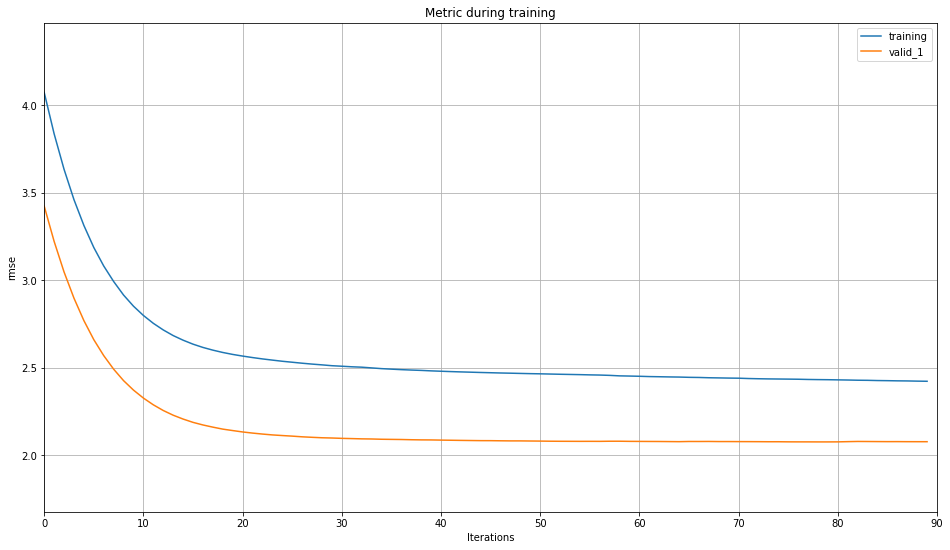

In [18]:
ax = lgb.plot_metric(model, metric="rmse", figsize=(16, 9))

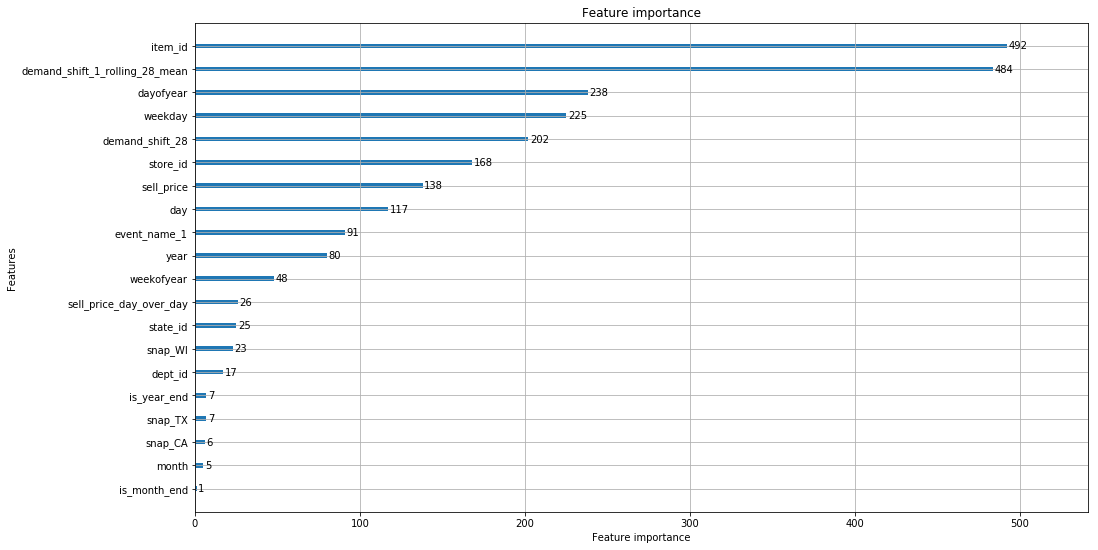

In [19]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [20]:
joblib.dump(model, model_path)

['..\\models\\model.joblib']